In [45]:
import matplotlib
import sys
import os
current_dir = os.path.dirname(os.path.abspath('./'))
if not current_dir in sys.path:
    sys.path.append(current_dir)
current_dir = os.path.dirname(os.path.abspath('../'))
if not current_dir in sys.path:
    sys.path.append(current_dir)
    
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
from dataclasses import dataclass

from typing import Annotated, Literal, TypeVar
import numpy as np
from nptyping import Shape, NDArray


In [41]:

@dataclass
class Polygon:
    coordinates: NDArray[Shape["2, *"], np.float64]

@dataclass
class Annotation:
    is_locked: bool

@dataclass
class Feature:
    geometry: Polygon
    properties: Annotation

@dataclass
class FeaturesCollection:
    features: list[Feature]
    
    def __iter__(self):
        return iter(self.features)


In [ ]:
# grads

plt.set_loglevel('CRITICAL')
for i, sample in zip(range(5), dataset):
  fig, axs = plt.subplots(1, 6, figsize=(32,16))
  transformed = transforms['test'](**sample)
  axs[0].imshow(transformed['image'])
  mask = transformed['mask'][:, :, 1]
  mask[mask == 0] = np.nan
  mask2 = transformed['mask'][:, :, 0]
  mask2[mask2 == 1] = np.nan
  mask2[mask2 == 0] = 1
  axs[1].imshow(transformed['image'])
  axs[1].imshow(mask, interpolation = 'none', vmin = 0)

  img = transformed['image']*255
  imgt = tf.expand_dims(tf.convert_to_tensor(img), axis=0)
  
  sobel = tf.image.sobel_edges(imgt)
  transformed = tf.image.image_gradients(imgt)
  grad_y = np.asarray(tf.squeeze(transformed[0]))
  grad_x = np.asarray(tf.squeeze(transformed[1]))

  axs[2].imshow(grad_x)
  axs[3].imshow(grad_x)
  axs[3].imshow(mask, interpolation = 'none', vmin = 0)
  axs[4].imshow(grad_y)
  axs[5].imshow(grad_y)
  axs[5].imshow(mask, interpolation = 'none', vmin = 0)
  
  plt.show()

In [ ]:
# sobel vs grads

plt.set_loglevel('CRITICAL')
for i, sample in zip(range(5), dataset):
  fig, axs = plt.subplots(1, 6, figsize=(32,16))
  transformed = transforms['test'](**sample)
  axs[0].imshow(transformed['image'])
  mask = transformed['mask'][:, :, 1]
  mask[mask == 0] = np.nan
  mask2 = transformed['mask'][:, :, 0]
  mask2[mask2 == 1] = np.nan
  mask2[mask2 == 0] = 1
  axs[1].imshow(transformed['image'])
  axs[1].imshow(mask, interpolation = 'none', vmin = 0)

  img = transformed['image']*255
  imgt = tf.expand_dims(tf.convert_to_tensor(img), axis=0)
  
  sobel = tf.image.sobel_edges(imgt)
  transformed = tf.image.image_gradients(imgt)
  grad_y = np.asarray(tf.squeeze(transformed[0]))
  grad_x = np.asarray(tf.squeeze(transformed[1]))

  sobel = tf.image.sobel_edges(imgt)
  sobel_y = np.asarray(sobel[0, :, :, :, 0]) # sobel in y-direction
  sobel_x = np.asarray(sobel[0, :, :, :, 1]) # sobel in x-direction

  axs[2].imshow(grad_x)
  axs[3].imshow(grad_x)
  axs[3].imshow(mask, interpolation = 'none', vmin = 0)
  axs[4].imshow(sobel_x)
  axs[5].imshow(sobel_x)
  axs[5].imshow(mask, interpolation = 'none', vmin = 0)
  
  plt.show()

In [ ]:
plt.set_loglevel('CRITICAL')
for i, sample in zip(range(1), dataset):
  fig, axs = plt.subplots(1, 4, figsize=(32,16))
  transformed = transforms['test'](**sample)
  axs[0].imshow(transformed['image'])
  mask = transformed['mask'][:, :, 1]
  mask[mask == 0] = np.nan
  mask2 = transformed['mask'][:, :, 0]
  mask2[mask2 == 1] = np.nan
  mask2[mask2 == 0] = 1
  axs[1].imshow(transformed['image'])
  axs[1].imshow(mask, interpolation = 'none', vmin = 0)

  img = transformed['image']*255
  print(img.shape)
  imgt = tf.expand_dims(tf.convert_to_tensor(img), axis=0)
  
  image_as_float = tf.saturate_cast(img, dtype = tf.float32)
  image_4d = tf.expand_dims(image_as_float, 0)    # Add in a batch dimension (of size 1)
  bb_image = tf.image.flip_up_down(image_4d)
  bb_image_uint = tf.saturate_cast(bb_image, dtype = tf.uint8)
  transformed = tf.squeeze(bb_image_uint)
  
  mask_3d = tf.transpose(np.stack([mask, mask, mask]), (1, 2, 0))
  mask_as_float = tf.saturate_cast(mask_3d, dtype = tf.float32)
  mask_4d = tf.expand_dims(mask_as_float, 0)
  transformed_mask = tf.image.flip_up_down(mask_4d)
  transformed_mask = tf.squeeze(transformed_mask)
  bb_mask_uint = tf.saturate_cast(transformed_mask, dtype = tf.uint8)
  transformed_mask = tf.squeeze(bb_mask_uint).numpy().astype(float)
  transformed_mask[transformed_mask == 0] = np.nan

  axs[2].imshow(transformed)
  axs[3].imshow(transformed)
  axs[3].imshow(transformed_mask[:, :, 0], interpolation = 'none', vmin = 0)
  
  plt.show()

In [48]:
def parse_json(path: os.PathLike) -> FeaturesCollection:
    with open(path) as file:
        data = json.load(file)
    
    return FeaturesCollection(
        [
            Feature(
                Polygon(
                    np.squeeze(np.array(feature['geometry']['coordinates']))
                ),
                feature['properties']['isLocked']
            )
            for feature in data['features']
        ]
    )

def get_coords(content: FeaturesCollection) -> list[NDArray[Shape["2, *"], np.float64]]:
    return [
        feature.geometry.coordinates
        for feature in content
    ]

In [49]:
path = '/home/user/Downloads/Telegram Desktop/782.geojson'



all_corrds = get_coords(parse_json(path))


In [52]:
import cv2

In [53]:
mask = np.zeros((1000, 1000))

cv2.fillPoly(mask, all_corrds, 1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

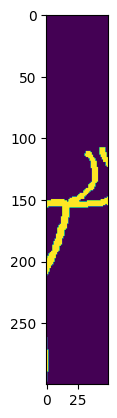

In [62]:
plt.imshow(mask[500:800, 400:450])

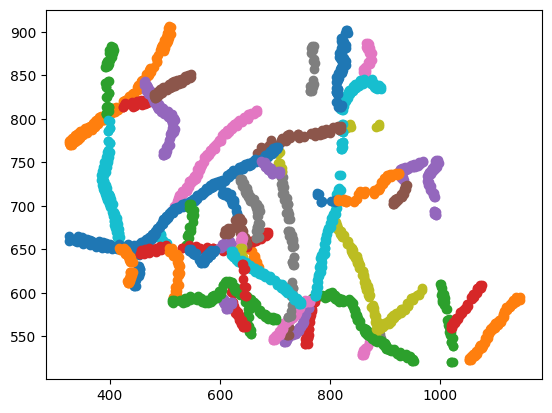

In [51]:
for coordinates in all_corrds:
    plt.plot(coordinates[:, 0], coordinates[:, 1], 'o')